  <h2>Problem Statement</h2>
  
As a reminder, our goal is to look at transcripts of various comedians and note their similarities and differences. Specifically, I'd like to know if Ali Wong's comedy style is different than other comedians, since she's the comedian that got me interested in stand up comedy.

In [3]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

In [4]:
#scrapes transcripts from scrapfromloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com'''
    page=requests.get(url).text
    soup=BeautifulSoup(page,"lxml")
    text=[p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text

In [5]:
# URLs of transcripts in scope
urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']

# Comedian names
comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']

In [6]:
transcripts=[url_to_transcript(u) for u in urls]

http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/
http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/
http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-

In [13]:
#pickle the files for later use
#make a new directory to hold the text files
!mkdir C:\Users\anant\Documents\MLDataSets\NLP_SentimentAnalysis_10thJune\Transcripts

In [18]:
#Method to Pickle the transcripts
for i,c in enumerate(comedians):
    with open("C:/Users/anant/Documents/MLDataSets/NLP_SentimentAnalysis_10thJune/Transcripts/"+c+".txt","wb") as file:
        pickle.dump(transcripts[i],file)

In [19]:
#load Pickled files
data={}
for i,c in enumerate(comedians):
    with open("transcripts/"+c+".txt","rb") as file:
        data[c]=pickle.load(file)

In [20]:
#Double check to make sure data has been loaded properly
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [21]:
#MOre checks
data['louis'][:2]

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

Cleaning the data
With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate.

Common data cleaning steps on all text:

Make text all lower case
Remove punctuation
Remove numerical values
Remove common non-sensical text (/n)
Tokenize text
Remove stop words
More data cleaning steps after tokenization:

Stemming / lemmatization
Parts of speech tagging
Create bi-grams or tri-grams
Deal with typos

In [22]:
# Let's take a look at our data again
next(iter(data.keys()))

'louis'

In [23]:
# Notice that our dictionary is currently in key: comedian, value: list of text format
next(iter(data.values()))

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

In [24]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [25]:
# Combine it!
data_combined={key:[combine_text(value)] for (key,value) in data.items()}

In [26]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df=pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns=['transcript']
data_df=data_df.sort_index()
data_df

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...


In [27]:
data_df.transcript.loc['ali']

"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go to 

In [29]:
#Applying the first round of cleaning techniques
import re
import string
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets,remove punctuation and remove words containing numbers.'''
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

round1=lambda x:clean_text_round1(x)

In [30]:
data_df.head()

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."


In [31]:
#Apply round1 of data cleaning 
data_clean=pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...
louis,intro\nfade the music out let’s roll hold there lights do the lights thank you thank you very much i appreciate that i don’t necessarily agree wit...


In [32]:
#Round2 of DataCleaning
def clean_text_round2(text):
    '''get rid of some additional punctuation and non-sensical text which we missed the first time around'''
    text=re.sub('[‘’“”…]', '', text)
    text=re.sub('\n','',text)
    return text

round2=lambda x:clean_text_round2(x)

In [33]:
#Apply round 2 of data cleaning
data_clean=pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the great...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was like nah ...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august thats pretty good all right hello hello chicago nice to see you again thank you ...
louis,introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with yo...


#we can also implement(stemming/lemmatization)
#combining two words into one term (bi-grams)

<b>Organizing the data</b>


1.corpus - collection of text

2.document -term matrix - word count term matrix

#corpus
we already made corpus.The Definition of corpus is a collection of texts, and they are all put together neately in a panda dataframe.

In [34]:
data_df

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...


In [35]:
# Let's add the comedians' full names as well
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

data_df['full_name'] = full_names
data_df

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.


In [38]:
!mkdir C:\Users\anant\Documents\MLDataSets\NLP_SentimentAnalysis_10thJune\Pickles

In [41]:
#let's pickle it for later use
data_df.to_pickle("C:/Users/anant/Documents/MLDataSets/NLP_SentimentAnalysis_10thJune/Pickles/corpus.pkl")

#Document Term Matrix


For many of the techniques we'll be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [42]:
#We are going to create a document term matrix using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english')
data_cv=cv.fit_transform(data_clean.transcript)
data_dtm=pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_dtm.index=data_clean.index
data_dtm

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [43]:
# Let's pickle it for later use
data_dtm.to_pickle("C:/Users/anant/Documents/MLDataSets/NLP_SentimentAnalysis_10thJune/Pickles/dtm.pkl")

In [44]:
#Pickle the cleaned data 
data_clean.to_pickle("C:/Users/anant/Documents/MLDataSets/NLP_SentimentAnalysis_10thJune/Pickles/data_clean.pkl")
pickle.dump(cv,open("C:/Users/anant/Documents/MLDataSets/NLP_SentimentAnalysis_10thJune/Pickles/cv.pkl","wb"))

#Performing 

Exploratory Data Analysis
We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:


Most common words - find these and create word clouds
Size of vocabulary - look number of unique words and also how quickly someone speaks
Amount of profanity - most common terms

#Most Common Words


Analysis

In [12]:
#read in the document - term matrix
import pandas as pd
data=pd.read_pickle('C:/Users/anant/Documents/MLDataSets/NLP_SentimentAnalysis_10thJune/Pickles/dtm.pkl')

In [13]:
data

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [14]:
data=data.transpose()

In [15]:
data.head(30)

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0
aah,0,0,0,0,0,0,0,0,0,3,0,0
abc,1,0,0,0,0,0,0,0,0,0,0,0
abcs,0,0,1,0,0,0,0,0,0,0,0,0
ability,0,0,0,1,0,0,0,0,0,0,0,1
abject,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
#find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top=data[c].sort_values(ascending=False).head(30)
    top_dict[c]=list(zip(top.index,top.values))

top_dict    

{'ali': [('like', 126),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('wanna', 21),
  ('oh', 21),
  ('gotta', 21),
  ('husband', 20),
  ('time', 19),
  ('got', 19),
  ('right', 19),
  ('cause', 18),
  ('day', 17),
  ('women', 17),
  ('people', 16),
  ('pregnant', 15),
  ('need', 14),
  ('hes', 14),
  ('god', 14),
  ('tell', 13),
  ('yeah', 13),
  ('theyre', 12),
  ('really', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 34),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('anthony', 27),
  ('just', 26),
  ('day', 26),
  ('say', 26),
  ('guys', 23),
  ('people', 22),
  ('tell', 19),
  ('youre', 19),
  ('grandma', 18),
  ('right', 18),
  ('time', 17),
  ('think', 17),
  ('thing', 17),
  ('did', 16),
  ('good', 16),
  ('school', 16),
  ('jokes', 16),
  ('yeah', 16),
  ('ive', 15),
  ('okay', 15),
  ('gonna', 15),
  ('baby', 15)],

In [17]:
top_dict.items()

dict_items([('ali', [('like', 126), ('im', 74), ('know', 65), ('just', 64), ('dont', 61), ('thats', 34), ('shit', 34), ('youre', 31), ('gonna', 28), ('ok', 26), ('lot', 24), ('wanna', 21), ('oh', 21), ('gotta', 21), ('husband', 20), ('time', 19), ('got', 19), ('right', 19), ('cause', 18), ('day', 17), ('women', 17), ('people', 16), ('pregnant', 15), ('need', 14), ('hes', 14), ('god', 14), ('tell', 13), ('yeah', 13), ('theyre', 12), ('really', 12)]), ('anthony', [('im', 60), ('like', 50), ('know', 39), ('dont', 38), ('joke', 34), ('got', 34), ('said', 31), ('thats', 31), ('anthony', 27), ('just', 26), ('day', 26), ('say', 26), ('guys', 23), ('people', 22), ('tell', 19), ('youre', 19), ('grandma', 18), ('right', 18), ('time', 17), ('think', 17), ('thing', 17), ('did', 16), ('good', 16), ('school', 16), ('jokes', 16), ('yeah', 16), ('ive', 15), ('okay', 15), ('gonna', 15), ('baby', 15)]), ('bill', [('like', 200), ('just', 149), ('right', 131), ('im', 107), ('know', 99), ('dont', 95), ('go

In [18]:
#print top 15 words said by each comedian
for comedian,top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word,count in top_words[0:14]]))
    print('----')

ali
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, wanna, oh, gotta
----
anthony
im, like, know, dont, joke, got, said, thats, anthony, just, day, say, guys, people
----
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
----
bo
know, like, im, love, think, just, bo, stuff, repeat, dont, yeah, want, right, cos
----
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, thats, fuck, fucking
----
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
----
jim
like, im, dont, right, fucking, just, went, know, youre, people, thats, day, oh, going
----
joe
like, people, just, dont, im, fucking, fuck, thats, gonna, theyre, know, youre, think, shit
----
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, hey, time, got
----
louis
like, just, know, dont, thats, youre, im, life, people, thing, gonna, hes, theres, cause
----
mike
like, im, know, said, just, dont, 

At this point, I cancreate word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.


In [19]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

In [21]:
#Let's first pull out the top 30 words for each comedian
words=[]
for comedian in data.columns:
    top=[word for (word,count) in top_dict[comedian]]
    for t in top:
        words.append(t)
    
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'wanna',
 'oh',
 'gotta',
 'husband',
 'time',
 'got',
 'right',
 'cause',
 'day',
 'women',
 'people',
 'pregnant',
 'need',
 'hes',
 'god',
 'tell',
 'yeah',
 'theyre',
 'really',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'said',
 'thats',
 'anthony',
 'just',
 'day',
 'say',
 'guys',
 'people',
 'tell',
 'youre',
 'grandma',
 'right',
 'time',
 'think',
 'thing',
 'did',
 'good',
 'school',
 'jokes',
 'yeah',
 'ive',
 'okay',
 'gonna',
 'baby',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'want',
 'fuck',
 'think',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'let',
 'theres',
 'little',
 'know',
 'like',
 'im',
 'love',
 'think',
 'just',
 'bo',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'fucking',
 'eye',
 'said',
 'p

In [22]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('really', 6),
 ('say', 6),
 ('fucking', 6),
 ('fuck', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('want', 5),
 ('didnt', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('little', 4),
 ('ive', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guys', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('baby', 1),
 ('dude', 1),
 ('l

In [23]:
#if more than half of comedians have it as a top word, exclude it from the list
add_stop_words=[word for word,count in Counter(words).most_common() if count > 6 ]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'time',
 'gonna',
 'think',
 'yeah',
 'said']

In [24]:
#Let's update the document term matrix with new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
#Read in cleaned data
data_clean=pd.read_pickle('C:/Users/anant/Documents/MLDataSets/NLP_SentimentAnalysis_10thJune/Pickles/data_clean.pkl')

In [26]:
#Add new stop words
stop_words=text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [28]:
#Recreate document term matrix
cv=CountVectorizer(stop_words=stop_words)
data_cv=cv.fit_transform(data_clean.transcript)
data_stop=pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_stop.index=data_clean.index

In [29]:
#Pickle it for later use
import pickle
pickle.dump(cv,open("C:/Users/anant/Documents/MLDataSets/NLP_SentimentAnalysis_10thJune/Pickles/cv_stop.pkl","wb"))
data_stop.to_pickle("C:/Users/anant/Documents/MLDataSets/NLP_SentimentAnalysis_10thJune/Pickles/dtm_stop.pkl")

In [31]:
# Make some word clouds!
from wordcloud import WordCloud

In [32]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

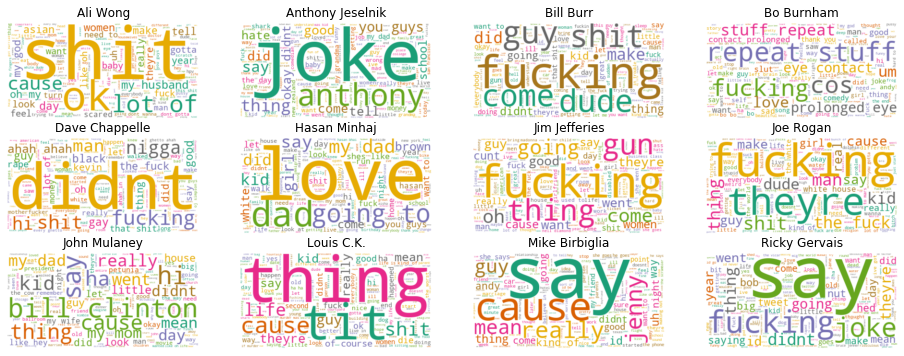

In [34]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

#Findings

1)Ali Wong talks s word a lot.

2) Almost everyone says the F-word a lot

1)Number of Words

#Analysis

In [36]:
#find the number of unique words that each comedian uses
#Identifying the non-zero  items in the document- term matrix, meaning that the word ocurs atleast once
unique_list= []
for comedian in data.columns:
    uniques=data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

In [37]:
# Create a new dataframe that contains this unique word count
data_words=pd.DataFrame(list(zip(full_names,unique_list)),columns=['comedian','unique_words'])
data_unique_sort=data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,983
9,Louis C.K.,1098
3,Bo Burnham,1272
6,Jim Jefferies,1313
0,Ali Wong,1341
8,John Mulaney,1389
4,Dave Chappelle,1404
7,Joe Rogan,1435
10,Mike Birbiglia,1494
5,Hasan Minhaj,1559


In [38]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list=[]
for comedian in data.columns:
    totals=sum(data[comedian])
    total_list.append(totals)
total_list

[3283, 2905, 5535, 3165, 4094, 4777, 4764, 4579, 4001, 3332, 4741, 4972]

In [39]:
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

In [40]:
#lets add some columns to our dataframe
data_words['total_words']=total_list
data_words['run_times']=run_times
data_words['words_per_minute']=data_words['total_words']/data_words['run_times']

In [41]:
#sort the data by words per minute to see who talks the solwest and fastest
data_wpm_sort=data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,983,2905,59,49.237288
3,Bo Burnham,1272,3165,60,52.750000
0,Ali Wong,1341,3283,60,54.716667
9,Louis C.K.,1098,3332,58,57.448276
4,Dave Chappelle,1404,4094,67,61.104478
6,Jim Jefferies,1313,4764,77,61.870130
10,Mike Birbiglia,1494,4741,76,62.381579
11,Ricky Gervais,1633,4972,79,62.936709
8,John Mulaney,1389,4001,62,64.532258
5,Hasan Minhaj,1559,4777,73,65.438356


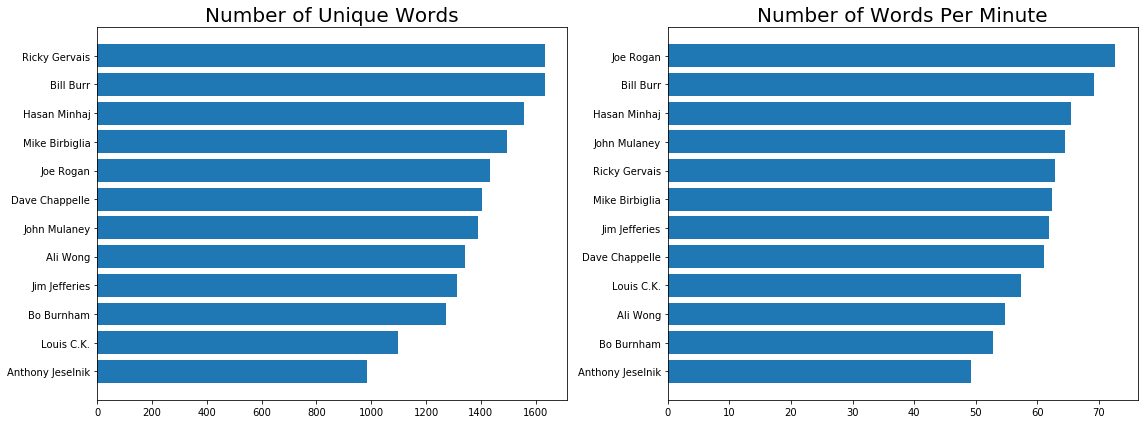

In [42]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

#Findings

Vocabulary

Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy

Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary

Talking Speed

Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast

Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow

Ali Wong is somewhere in the middle in both cases.

3) Amount of Profanity

In [43]:
#Lets take look at most common words again
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('really', 6),
 ('say', 6),
 ('fucking', 6),
 ('fuck', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('want', 5),
 ('didnt', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('little', 4),
 ('ive', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guys', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('baby', 1),
 ('dude', 1),
 ('l

In [45]:
# Let's isolate just these bad words
data_bad_words=data.transpose()[['fucking','fuck','shit']]
data_bad_words

,fucking,fuck,shit
ali,5,11,34
anthony,6,9,9
bill,70,36,63
bo,22,15,6
dave,32,33,45
hasan,8,16,15
jim,78,37,20
joe,69,66,40
john,2,2,6
louis,6,15,25


In [47]:
data_profanity=pd.concat([data_bad_words.fucking+data_bad_words.fuck,data_bad_words.shit],axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,106,63
bo,37,6
dave,65,45
hasan,24,15
jim,115,20
joe,135,40
john,4,6
louis,21,25


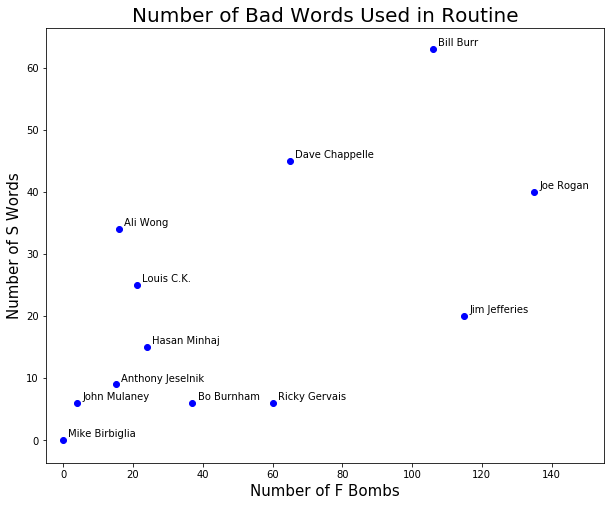

In [48]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

<h2>Sentiment Analysis</h2>

In [1]:
import pandas as pd
data=pd.read_pickle('C:/Users/anant/Documents/MLDataSets/NLP_SentimentAnalysis_10thJune/Pickles/corpus.pkl')

In [2]:
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


 Linguistic researchers have labeled the sentiment of words based on their domain expertise we use <b>Textblob</b> module to use the sentiment of words. Sentiment od words may change if the word is in sentence 

In [3]:
from textblob import TextBlob

#Sentiment of Routine

In [4]:
pol=lambda x:TextBlob(x).sentiment.polarity
sub=lambda x:TextBlob(x).sentiment.subjectivity

data['polarity']=data['transcript'].apply(pol)
data['subjectivity']=data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002690,0.513958
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086856,0.460619
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.056665,0.515796


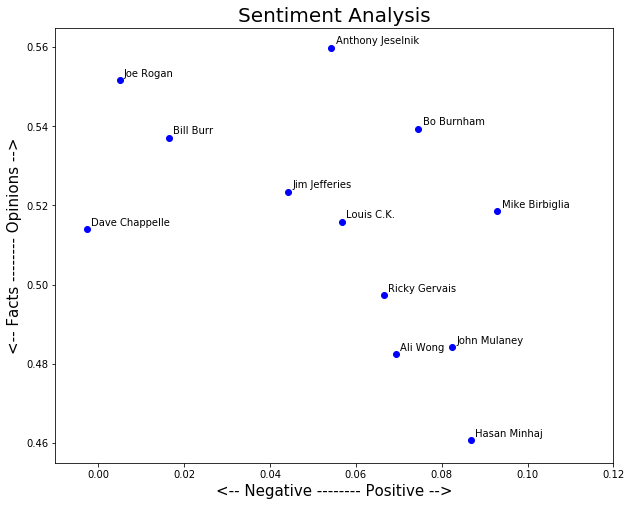

In [6]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

#Sentiment of Routine over time

In [12]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [13]:
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle,-0.002690,0.513958
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj,0.086856,0.460619
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.,0.056665,0.515796


In [14]:
list_pieces=[]
for t in data.transcript:
    split=split_text(t)
    list_pieces.append(split)
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go t

In [15]:
len(list_pieces)

12

In [16]:
len(list_pieces[0])

10

In [17]:
#caluclate the polarity of each piece of text

polarity_transcript=[]
for lp in list_pieces:
    polarity_piece=[]
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
        polarity_transcript.append(polarity_piece)
polarity_transcript

[[0.11168482647296207,
  0.056407029478458055,
  0.09445691155249979,
  0.09236886724386723,
  -0.014671592775041055,
  0.09538361348808912,
  0.06079713127248339,
  0.08721655328798185,
  0.030089690638160044,
  0.07351994851994852],
 [0.11168482647296207,
  0.056407029478458055,
  0.09445691155249979,
  0.09236886724386723,
  -0.014671592775041055,
  0.09538361348808912,
  0.06079713127248339,
  0.08721655328798185,
  0.030089690638160044,
  0.07351994851994852],
 [0.11168482647296207,
  0.056407029478458055,
  0.09445691155249979,
  0.09236886724386723,
  -0.014671592775041055,
  0.09538361348808912,
  0.06079713127248339,
  0.08721655328798185,
  0.030089690638160044,
  0.07351994851994852],
 [0.11168482647296207,
  0.056407029478458055,
  0.09445691155249979,
  0.09236886724386723,
  -0.014671592775041055,
  0.09538361348808912,
  0.06079713127248339,
  0.08721655328798185,
  0.030089690638160044,
  0.07351994851994852],
 [0.11168482647296207,
  0.056407029478458055,
  0.094456911

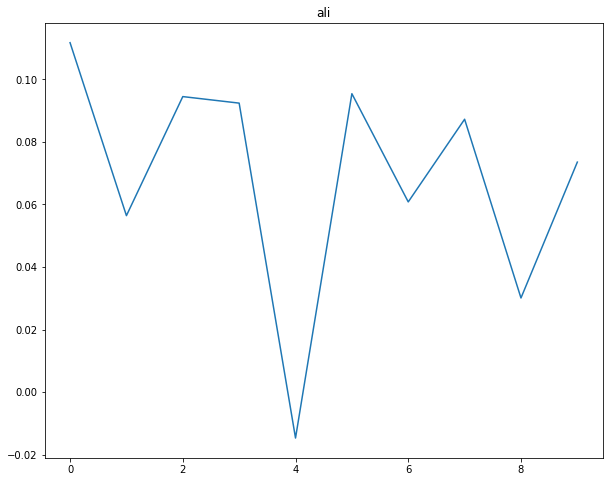

In [18]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

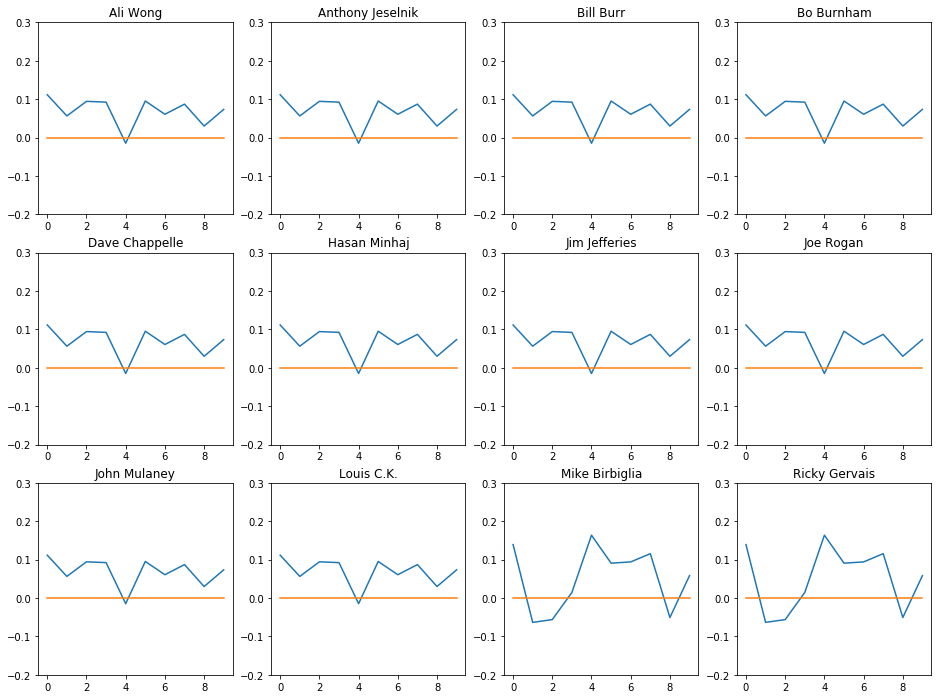

In [19]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [21]:
#Conclusions of Sentiment Analyisi using polarity
#Ali wong stays generally positive throughout her routine. similar comedians are Louis ck and mike
#Dave chappelle has pretty down moments in his routine

<h1> Topic Modeling</h1>

The Goal of topic modelling is to find out various topics that are present in your corpus each document in the corups is made up of at least one topic , if not multipe topics

Here, we will consider Latent Dirichlet Allocation(LDA), which is one of topic modelling techniques, designed for text data.

to use topic modelling technique we need to provide 
(1) a document- term matrix
(2) number of topics you would like algorithem to pick up.

#Topic Modelling - Attempt 1 (All Text)

In [23]:
import pandas as pd
import pickle
data=pd.read_pickle('C:/Users/anant/Documents/MLDataSets/NLP_SentimentAnalysis_10thJune/Pickles/dtm_stop.pkl')
data

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [26]:
#import the necessary modules for LDA with gensim
from gensim import matutils,models


In [27]:
import scipy.sparse

In [28]:
#one of the required inputs
tdm=data.transpose()
tdm.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [30]:
#we are going to put the document-term matrix into a new gensim format, from df ---> sparce matrix --> gensim corpus
sparse_counts=scipy.sparse.csr_matrix(tdm)
corpus=matutils.Sparse2Corpus(sparse_counts)

In [32]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv=pickle.load(open("C:/Users/anant/Documents/MLDataSets/NLP_SentimentAnalysis_10thJune/Pickles/cv_stop.pkl","rb"))
id2word=dict((v,k) for k,v in cv.vocabulary_.items())

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [34]:
lda=models.LdaModel(corpus=corpus,id2word=id2word,num_topics=2,passes=10)
lda.print_topics()

[(0,
  '0.011*"fucking" + 0.007*"fuck" + 0.007*"shit" + 0.006*"going" + 0.005*"theyre" + 0.005*"say" + 0.005*"want" + 0.005*"didnt" + 0.005*"oh" + 0.005*"went"'),
 (1,
  '0.005*"cause" + 0.005*"say" + 0.005*"really" + 0.004*"day" + 0.004*"good" + 0.004*"thing" + 0.004*"shit" + 0.004*"oh" + 0.004*"love" + 0.004*"hes"')]

In [35]:
lda=models.LdaModel(corpus=corpus,id2word=id2word,num_topics=3,passes=10)
lda.print_topics()

[(0,
  '0.007*"fucking" + 0.007*"say" + 0.006*"went" + 0.006*"going" + 0.006*"thing" + 0.006*"day" + 0.005*"hes" + 0.005*"theyre" + 0.005*"life" + 0.005*"good"'),
 (1,
  '0.010*"shit" + 0.008*"fucking" + 0.005*"dude" + 0.005*"fuck" + 0.005*"want" + 0.005*"hes" + 0.004*"did" + 0.004*"make" + 0.004*"theyre" + 0.004*"cause"'),
 (2,
  '0.006*"fucking" + 0.006*"fuck" + 0.005*"shit" + 0.005*"oh" + 0.005*"really" + 0.005*"didnt" + 0.005*"say" + 0.005*"man" + 0.005*"cause" + 0.005*"good"')]

In [36]:
lda=models.LdaModel(corpus=corpus,id2word=id2word,num_topics=4,passes=10)
lda.print_topics()

[(0,
  '0.006*"cause" + 0.006*"life" + 0.006*"thing" + 0.005*"hes" + 0.005*"really" + 0.005*"little" + 0.005*"old" + 0.004*"way" + 0.004*"say" + 0.004*"good"'),
 (1,
  '0.006*"say" + 0.005*"going" + 0.005*"want" + 0.005*"dad" + 0.005*"oh" + 0.004*"day" + 0.004*"tell" + 0.004*"guys" + 0.004*"really" + 0.004*"says"'),
 (2,
  '0.013*"fucking" + 0.011*"went" + 0.007*"day" + 0.007*"oh" + 0.007*"going" + 0.006*"fuck" + 0.006*"thing" + 0.006*"goes" + 0.005*"guns" + 0.005*"theyre"'),
 (3,
  '0.012*"fucking" + 0.008*"fuck" + 0.008*"shit" + 0.006*"didnt" + 0.006*"theyre" + 0.005*"say" + 0.005*"man" + 0.005*"hes" + 0.005*"want" + 0.005*"theres"')]

Topic Modeling - Attempt #2 (Nouns Only)

In [37]:
#let's create a function to pull out nouns from a string of text
from nltk import word_tokenize,pos_tag

In [38]:
def nouns(text):
    '''Given a string of text , tokenize the text and pull out only the nouns'''
    is_noun=lambda pos:pos[:2] =='NN'
    tokenized= word_tokenize(text)
    all_nouns=[word for (word,pos) in pos_tag(tokenized) if is_noun(pos)]
    return ''.join(all_nouns)

In [39]:
#Read the cleaned data , before the countvectorizer step
data_clean=pd.read_pickle("C:/Users/anant/Documents/MLDataSets/NLP_SentimentAnalysis_10thJune/Pickles/data_clean.pkl")
data_clean

,transcript
ali,ladies and gentlemen please welcome to the sta...
anthony,thank you thank you thank you san francisco th...
bill,all right thank you thank you very much thank...
bo,bo what old macdonald had a farm e i e i o and...
dave,this is dave he tells dirty jokes for a living...
hasan,whats up davis whats up im home i had to bri...
jim,ladies and gentlemen please welcome to the ...
joe,ladies and gentlemen welcome joe rogan wha...
john,all right petunia wish me luck out there you w...
louis,introfade the music out lets roll hold there l...


In [44]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anant\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [45]:
#Apply the nouns function to filter only on nouns
data_nouns=pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
ali,ladiesgentlemenstagealihithankhellonashitcause...
anthony,thankthankpeopleiemifranciscocityworldimstagep...
bill,thankthankpleasuregeorgiaareaoasisijunekindhea...
bo,macdonaldfarmeiofarmpigeiisnortmacdonaldfarmei...
dave,jokeslivingstareworkprofoundtrainthoughtalchem...
hasan,whatsdaviswhatshomeinetflixlayorkisondaviscali...
jim,ladiesgentlemenstagemrjimjefferiesthankthatsen...
joe,ladiesgentlemenjoefuckthanksphonefuckfaceiphon...
john,petuniathatshellohellochicagothankcrowdenergys...
louis,musicletslightslightsthankiiplaceplacemilesdir...


In [46]:
#create a document term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
#Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [53]:
#Recreate a document-term matrix with only nouns
cvn=CountVectorizer(stop_words=stop_words)
data_cvn=cvn.fit_transform(data_nouns.transcript)
data_dtm=pd.DataFrame(data_cvn.toarray(),columns=cvn.get_feature_names())
data_dtm.index=data_nouns.index
data_dtm

accesstitssomethingtityeahmomsiiimeantimomstitiyoursupguyguytitthatseverythingmoderationsomethinghappensof  \
ali                                                      0                                                            
anthony                                                  0                                                            
bill                                                     0                                                            
bo                                                       0                                                            
dave                                                     0                                                            
hasan                                                    0                                                            
jim                                                      0                                                            
joe                                                      0                                                            
john                                                     0                                                            
louis                                                    1                                                            
mike                                                     0                                                            
ricky                                                    0                                                            

         ahah  ahahahah  ahahahahahah  allan  \
ali         0         0             0      0   
anthony     0         0             0      2   
bill        0         0             0      0   
bo          0         0             0      0   
dave       10         2             1      0   
hasan       0         0             0      0   
jim         0         0             0      0   
joe         0         0             0      0   
john        0         0             0      0   
louis       0         0             0      0   
mike        0         0             0      0   
ricky       0         0             0      0   

         aspectireligionsenseeverybodyelsesiimbasisreligionbasisreligionsensecommandmentsanybodywifethatsbikerightsensebrokenibrokencommandmenthaventanybodythoughtsiisomeoneplaneloafersgoldtoeddresssocksfeetanklesfeetithingthingwrappingshhthingstoriesreligioniangelesbunchscientologiststimestoryscientologyishitilifeyeahguysnameronthousandsyearslotmysteryguyyearsdriverssecuritynumbertheresfootagetoemotherfuckerrightidennysreligionheyeverybodyspaceshipsneakerscruiselookimparaphrasingscientologiststhatsishitikindwomanbabywaterdayssensedayisensedoesntspaceshipspaceshuttlesneakerslotshiticauseistoryiadultistoryiyearsstoryfuckchimneyitoothfairyeasterbunnywouldntbabylakebucketsshrimpcoursesensestuffahsonmothermomstoothfairyrabbitstitsnbabankerscuntsdreamsrightiwowworldshitgorillastoryidecisiongongongonpersonthatschristiansdoucherightchristianfootbasekindgocoupletimesyearparentstownitimedontoptionshitmomentmomentshooterrockrighthesrideteamoutrockdudethatsreligioniriotactanybodydayfulfillmentscripturesimplaceimreligionagentidsomethingpeopleshithaventanythingigighelsinkitheyrelutheranpigeonjust  \
ali                                                      0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [56]:
#create a gensim corpus
corpussn=matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))
#create the vocabulary dictionary 
id2wordn=dict((v,k) for k,v in cvn.vocabulary_.items())

In [59]:
#lets start with 2 topics
ldan=models.LdaModel(corpus=corpussn,num_topics=2,id2word=id2wordn,passes=10)
ldan.print_topics()

[(0,
  '0.014*"thingsradio" + 0.014*"allan" + 0.008*"youreyourecandidatecandlelightvigilsguyspeoplepeoplenewsguyiliarworldmomentskindstartcareimomentsimwowsomethinglotilltvnothingilliassnothingasstatripsbathroomassassholesjust" + 0.008*"assholeswaistbandpajamaassholesbagleavesnobodylawnleavesgrasswispwindkidwayhomedayschoolratsdescriptionthingageokimhaha" + 0.008*"yourepeopleelbowtitthatstitititisensitivitymaleelbowtitscausetacktit" + 0.008*"sharksfinstopwateritheydcauseithinksharkssharksslickheynobodyideawhatstheressharkpredatoryourepredatorimaginetimeyourehungrychaseguywhoslife" + 0.008*"daughtersdontslavekillfoodchainmustkindsstuffimdealalternativesanythingkindthingyourefoodchainyourefood" + 0.008*"ransomnotelotmagazineshaharrghdickspacedirectionspaydirtsomeplacedatethatslinesomethingtheressomethingdatecausewomengonsomethingsheshesideahesshitideahesare" + 0.008*"istagekids" + 0.008*"shitcameramurdermurderpeoplemurdererspeoplepeoplenobodypeoplesomebodymurdermurderanybodymeetingcreepi

In [60]:
ldan=models.LdaModel(corpus=corpussn,num_topics=3,id2word=id2wordn,passes=10)
ldan.print_topics()

[(0,
  '0.010*"impussyyearspussytimetimehandpantsmomentpeacesignafterwardssnailtrailfingersgodwandslimeghostbusterskindmotherimgonimibitsciencelotfaultiiateplanskittlesuterussmokerslungiprogesteronelevelshormonepillssuppositoriespopnightjobboatifrontcoworkerspointpillieverythingeverythingsideeffectprogesteronewaysconferencetableurgefingersifingersigoddamnfingersdaysniffsandwichuhmmmpropertybrotherswhatsmmmtimefingersfingerswayfingershooddoctorfingerswebmdhusbandikidlotpeoplethatslotdudethats" + 0.010*"thatsokin" + 0.010*"idontshockstuffpeopleivegasishitbenefitdoubtcaseredneckbearddickboatmiddleswampvarmintsideassamesexmarriageyeahdidntkindastuffchurchmanshitsomethingbookrightiitunesfuckindayslanguagefriendliethsomeonethatsideasguyfaultto" + 0.010*"minduturnimindoturntimecaraccidentimgodfaceeverybodyeverybodycorollamessbearclawscratchsidebrickwallhoodhandprintspedestriansexistenceiwhatschildrencompanyimomblownmidlifecrisiscauseshescenturyfriendsfriendsfriendsimdoesntfriendslifehourmovie

In [61]:
ldan=models.LdaModel(corpus=corpussn,num_topics=4,id2word=id2wordn,passes=10)
ldan.print_topics()

[(0,
  '0.094*"ghetto" + 0.086*"ahah" + 0.019*"ii" + 0.019*"ahahahah" + 0.019*"yes" + 0.010*"petuniathatshellohellochicagothankcrowdenergyshowokaythankcrowdsenergybeginningplacesjudgecrowdswayroombirthdaysignwaitposterboardyoureineedlettersbigasshbigassgodphumpphumppsortmotorcyclesidecarsituationiroomykindcurledupyblockletterslookbirthdaylessonyoureyeahpastbigassblettersspaceyourechicagoiviolentconfrontationcausefightmomentistagepeoplevibevibeheysouplapillfeetimdollmolestationshowcomedianmanwhilehomeiwifeiwifethatswifepersoniairplaneannasticketdidntanythingticketpriorityaccessmatteriuhwifeboardyescourserightwayiohtimescomeyeahiwaywifekickasswifeonetalkwifemarriageididntwifethatsoohwhosfellaiwifeirelationshipsjokethatsthingicauseidrelationshipsionesrelationshipworldviewcauseikidiamericaskidspersonsomeoneiimmeanwayonecarecreepyexthingslotinformationanyonewhosdickparentsicantilotpeopleexpressionexpressionpeoplecowmilkbananasexpressiongendersensecowmilkyourecowthatssituationproblempointdai

#Topic Modelling - Attempt #3 (Nouns and Adjectives)

In [62]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [63]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
ali,ladies gentlemen welcome stage ali wong hi wel...
anthony,thank san francisco thank good people surprise...
bill,right thank thank pleasure greater atlanta geo...
bo,old macdonald farm e i i o farm pig e i i snor...
dave,dirty jokes living stare most hard work profou...
hasan,whats davis whats im home i netflix special la...
jim,ladies gentlemen welcome stage mr jim jefferie...
joe,ladies gentlemen joe fuck san francisco thanks...
john,right petunia august thats good right hello he...
louis,music lets lights lights thank much i i i nice...


In [64]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aah,abc,abcs,ability,abject,able,...,ze,zealand,zee,zeppelin,zero,zillion,zombie,zombies,zoo,éclair
ali,0,0,0,0,0,1,0,0,0,2,...,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,10,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,1,1,0,0
bo,0,1,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,1,...,0,0,2,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [66]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.005*"mom" + 0.004*"parents" + 0.003*"ass" + 0.003*"door" + 0.003*"dick" + 0.003*"class" + 0.002*"friend" + 0.002*"gun" + 0.002*"wife" + 0.002*"hasan"'),
 (1,
  '0.007*"joke" + 0.004*"jokes" + 0.003*"bo" + 0.003*"repeat" + 0.003*"ahah" + 0.003*"gay" + 0.003*"dead" + 0.003*"young" + 0.003*"anthony" + 0.003*"eye"')]

In [67]:
# Let's work with 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.005*"wife" + 0.004*"bo" + 0.004*"gay" + 0.004*"clinton" + 0.004*"repeat" + 0.003*"ahah" + 0.003*"mom" + 0.003*"friend" + 0.003*"eye" + 0.003*"comedy"'),
 (1,
  '0.004*"joke" + 0.004*"ok" + 0.004*"jenny" + 0.003*"mom" + 0.003*"anthony" + 0.003*"parents" + 0.003*"husband" + 0.003*"friend" + 0.003*"dead" + 0.003*"tit"'),
 (2,
  '0.005*"joke" + 0.004*"hasan" + 0.004*"guns" + 0.003*"class" + 0.003*"ass" + 0.003*"parents" + 0.003*"mom" + 0.003*"youve" + 0.003*"girlfriend" + 0.003*"cunt"')]

In [68]:
# Let's start with 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.013*"joke" + 0.010*"anthony" + 0.007*"grandma" + 0.006*"jokes" + 0.006*"mad" + 0.006*"shark" + 0.005*"mom" + 0.005*"san" + 0.004*"zealand" + 0.004*"today"'),
 (1,
  '0.006*"joke" + 0.006*"bo" + 0.005*"repeat" + 0.004*"eye" + 0.004*"ok" + 0.004*"contact" + 0.003*"husband" + 0.003*"um" + 0.003*"jokes" + 0.003*"nuts"'),
 (2,
  '0.005*"wife" + 0.005*"clinton" + 0.005*"ahah" + 0.005*"son" + 0.004*"guns" + 0.004*"ass" + 0.004*"friend" + 0.004*"mom" + 0.004*"gay" + 0.003*"cow"'),
 (3,
  '0.004*"parents" + 0.003*"mom" + 0.003*"hasan" + 0.003*"jenny" + 0.003*"door" + 0.003*"dick" + 0.003*"morning" + 0.002*"religion" + 0.002*"jesus" + 0.002*"love"')]

#Identify Topics in Each Document

Out of the 9 topic models we looked at, the nouns and adjectives, 4 topic one made the most sense. So let's pull that down here and run it through some more iterations to get more fine-tuned topics.

In [70]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.010*"joke" + 0.005*"jokes" + 0.005*"bo" + 0.004*"repeat" + 0.004*"eye" + 0.004*"anthony" + 0.003*"contact" + 0.003*"dead" + 0.003*"jenner" + 0.003*"stupid"'),
 (1,
  '0.006*"mom" + 0.006*"parents" + 0.004*"ok" + 0.003*"hasan" + 0.003*"jenny" + 0.003*"clinton" + 0.003*"york" + 0.003*"friend" + 0.003*"date" + 0.002*"idea"'),
 (2,
  '0.005*"gun" + 0.005*"son" + 0.005*"guns" + 0.004*"ahah" + 0.004*"gay" + 0.004*"ass" + 0.003*"wife" + 0.003*"class" + 0.003*"nigga" + 0.003*"girlfriend"'),
 (3,
  '0.000*"lights" + 0.000*"kinda" + 0.000*"fifth" + 0.000*"chase" + 0.000*"jews" + 0.000*"minor" + 0.000*"holy" + 0.000*"magazines" + 0.000*"summer" + 0.000*"joke"')]

These four topics look pretty decent. Let's settle on these for now.

Topic 0: mom, parents
Topic 1: husband, wife
Topic 2: guns
Topic 3: profanity

In [72]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(1, 'ali'),
 (0, 'anthony'),
 (2, 'bill'),
 (0, 'bo'),
 (2, 'dave'),
 (1, 'hasan'),
 (2, 'jim'),
 (0, 'joe'),
 (1, 'john'),
 (1, 'louis'),
 (1, 'mike'),
 (0, 'ricky')]

For a first pass of LDA, these kind of make sense to me, so we'll call it a day for now.

Topic 0: mom, parents [Anthony, Hasan, Louis, Ricky] </n>

Topic 1: husband, wife [Ali, John, Mike] </n>

Topic 2: guns [Bill, Bo, Jim] </n>

Topic 3: profanity [Dave, Joe] </n>

<h1>Text Generation</h1>

Introduction
Markov chains can be used for very basic text generation. we can make a simple assumption that the next word is only dependent on the previous word- basic assumption of markov chain

#Select text to imitate
here we are going to generate text in the style of ali wong, so as a first step, let's extract text from her coedy routine


In [1]:
#read the corpus , including punctuation
import pandas as pd
data=pd.read_pickle('C:/Users/anant/Documents/MLDataSets/NLP_SentimentAnalysis_10thJune/Pickles/corpus.pkl')

In [2]:
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


In [3]:
#extract only ali wong's text
ali_text=data.transcript.loc['ali']
ali_text[:200]

'Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, l'

Build a Markov Chain Function
we are going to build a simple markov chain function that creates a dictionary:

    1) The keys should be all if the words in the corpus
    
    2) The values should be a list of the words that follows the keys

In [4]:
from collections import defaultdict

In [14]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [15]:
#create the dictionary for ali's routine . take a look at it
ali_dict=markov_chain(ali_text)
ali_dict

{'Ladies': ['and'],
 'and': ['gentlemen,',
  'foremost,',
  'then',
  'have',
  'there’s',
  'resentment',
  'get',
  'get',
  'says,',
  'my',
  'she',
  'snatch',
  'running',
  'fighting',
  'yelling',
  'it',
  'she',
  'I',
  'I',
  'I',
  'we',
  'watched',
  'I',
  'have',
  'that',
  'recycling,',
  'disturbing',
  'it’s',
  'all',
  'just…',
  'be',
  'half-Vietnamese.',
  'his',
  'slide.',
  'your',
  'inflamed',
  'you’re',
  'I',
  'half-Japanese',
  'I’m',
  'half-Vietnamese.',
  'playing',
  'rugby.',
  'foremost,',
  'a',
  'emotionally',
  'I',
  '20',
  'neither',
  'I',
  'I–',
  'then',
  'it’s',
  'find',
  'start',
  'just',
  'caves',
  'gets',
  'is',
  'very',
  'for',
  'I',
  'she',
  'rise',
  'be',
  'eat',
  'watch',
  'be',
  'now',
  'most',
  'in',
  'then',
  'digitally',
  'then',
  'then',
  'then',
  'steady',
  'brings',
  'let',
  'reverberate',
  'say,',
  'my',
  'he',
  'when',
  'I’m',
  'sicker,',
  'sicker.',
  'sicker,',
  'sicker,',
  'pos

#Create a Text Generator
we are going to create a function that generates sentences.It will take two things as inout:

1) The dictionary we just created

2)The Number of words you want generated

In [21]:
import random

def generate_sentence(chain, count=10):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [22]:
generate_sentence(ali_dict)

'Jungle Asians are the velocity with which means we do….'

<h1> Conclusion and Insights</h1>

1) Our initial Question was what makes ali wong's comedy routine standout?

Steps We followed

1) Exploratory Data Analysis

    1.1) Top Words(Word Cloud)
    
    1.2) Vocabulary size (Bar Plot)
    
    1.3) Amount of Profanity (Scatter Plot)

2) NLP Techniques 

    2.1) Sentiment Analysis
    
    2.2) Topic Modeling
    
    2.3) Text Generation


Insights About Ali

1) Ali wong talks about her family a lot

2) She has the highest s-word to f-word ratio

3) Her Speech tends to be more positive and less opinionated

People who don't say the f-word more often
Mike ,John

People who have routines with similar sentiment pattern
Louis c.k, Mike

People who talk about similar topics including 'mom' and 'Parents':
John ,Mike

